In [2]:
# 1. Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [3]:
# 2. Read the data as a dataframe
dataframe=pd.read_csv('C:/Users/Sujana/Downloads/insurance.csv')

In [4]:
# Display the first five of dataset
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 3a. Shape of the dataset
dataframe.shape

(1338, 7)

In [5]:
# 3b.Data type of the each attribute
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# 3c. Checking the presence of missing values
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# information about the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# 3d.  5 point summary of numerical attributes
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Charges Distribution')

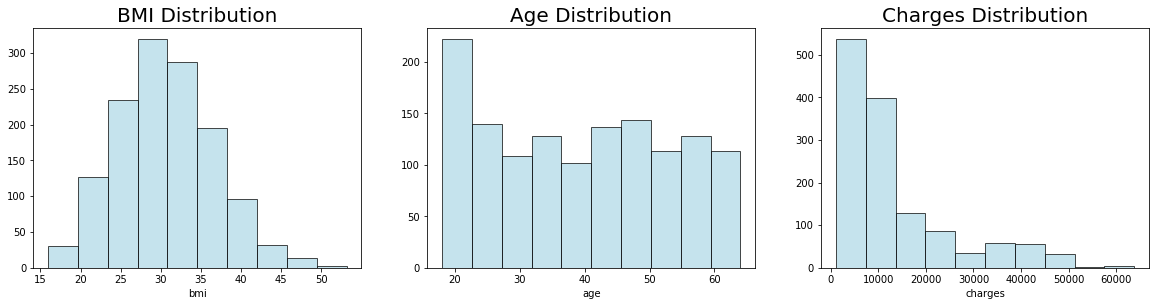

In [9]:
# 3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(dataframe.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')
plt.title('BMI Distribution',fontsize=20)

plt.subplot(3,3,2)
plt.hist(dataframe.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')
plt.title('Age Distribution',fontsize=20)

plt.subplot(3,3,3)
plt.hist(dataframe.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')
plt.title('Charges Distribution',fontsize=20)


* Bmi looks normally distributed
* Age seems normally distributed
* Charges are highly skewed

Text(0.5, 1.0, 'Charges Distribution')

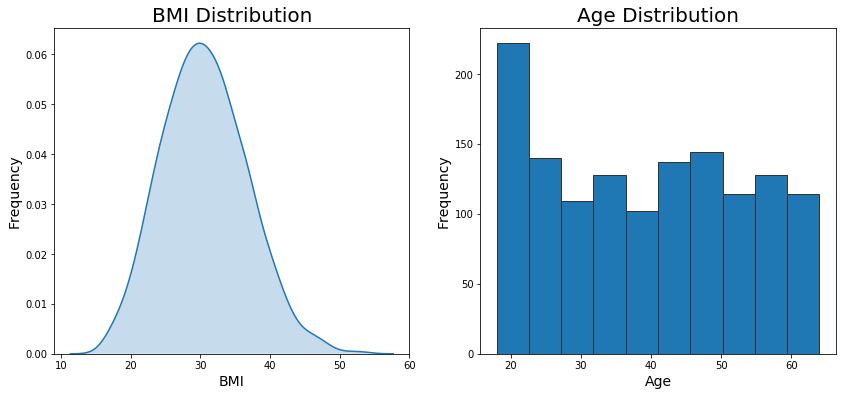

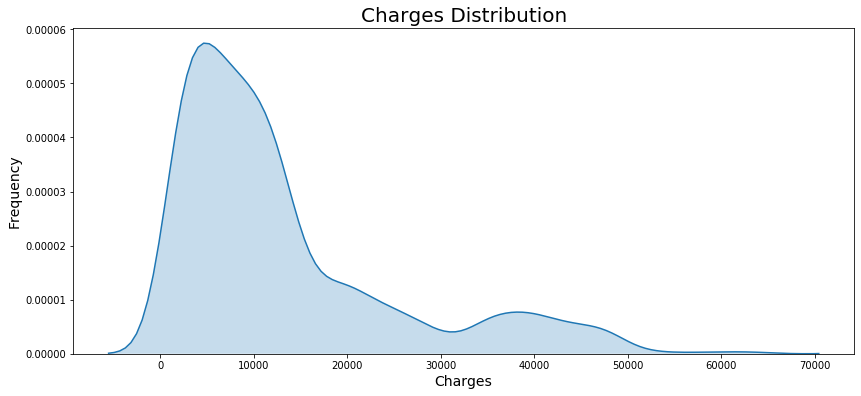

In [10]:
fig21, (ax21,ax22) = plt.subplots(1,2)
fig21.set_size_inches(14,6)

sns.kdeplot(dataframe['bmi'], ax=ax21, shade=True, legend=False)
ax21.set_xlabel("BMI", fontsize=14)
ax21.set_ylabel("Frequency", fontsize=14)
ax21.set_title("BMI Distribution", fontsize=20)

ax22.hist(dataframe['age'],bins=10, edgecolor='0.2')
ax22.set_xlabel("Age", fontsize=14)
ax22.set_ylabel("Frequency", fontsize=14)
ax22.set_title("Age Distribution", fontsize=20)

fig22, ax23 = plt.subplots()
fig22.set_size_inches(14,6)

sns.kdeplot(dataframe['charges'], ax=ax23, shade=True, legend=False)
ax23.set_xlabel("Charges", fontsize=14)
ax23.set_ylabel("Frequency", fontsize=14)
ax23.set_title("Charges Distribution", fontsize=20)

In [11]:
# 3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
skewness = pd.DataFrame({'Skewness' : [stats.skew(dataframe.bmi),stats.skew(dataframe.age),stats.skew(dataframe.charges)]},
                        index=['bmi','age','charges'])
skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


* Skew of bmi is very less as seen in the above 
* Age is uniformly distributed and there's hardly any skew
* Charges are highly skewed

Text(0.5, 0, 'Charges')

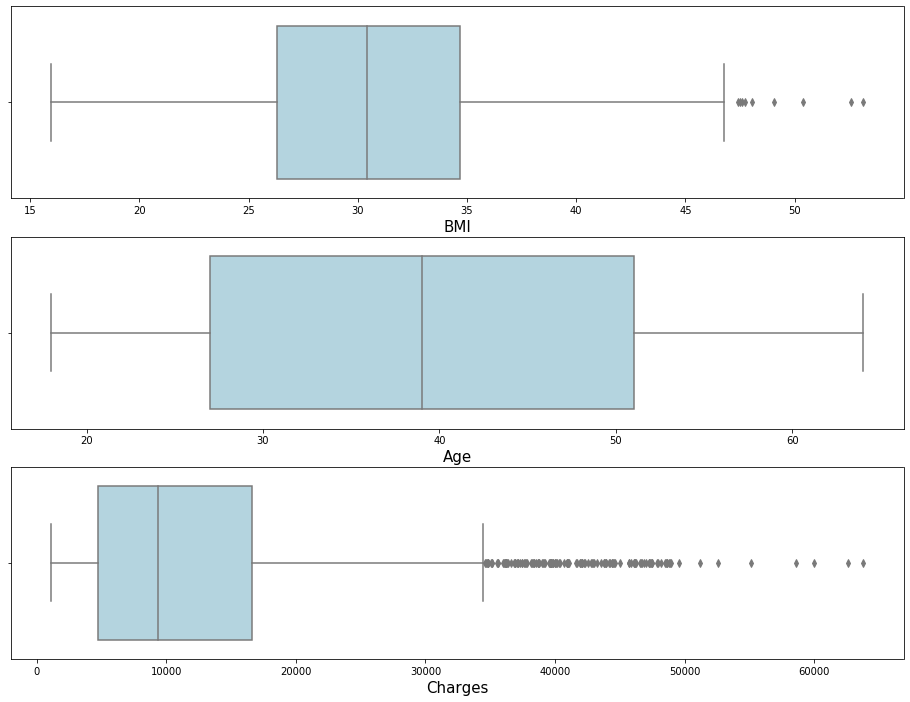

In [12]:
# 3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

plt.figure(figsize= (16,12))

plt.subplot(3,1,1)
sns.boxplot(dataframe.bmi, color='lightblue')
plt.xlabel('BMI', fontsize=15)

plt.subplot(3,1,2)
sns.boxplot(dataframe.age, color='lightblue')
plt.xlabel('Age',fontsize=15)

plt.subplot(3,1,3)
sns.boxplot(dataframe.charges, color='lightblue')
plt.xlabel('Charges',fontsize=15)

* Bmi has a few extreme values i.e.  few outliers
* Charges as it is highly skewed, there are quiet a lot of extreme values (outliers)

Text(0.5, 1.0, 'Dependent Distribution')

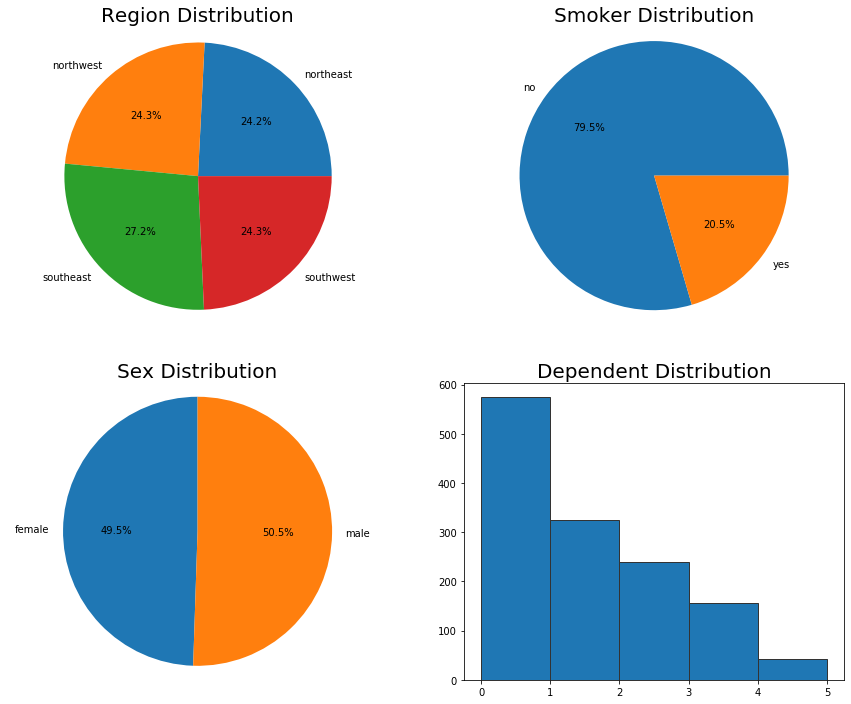

In [13]:
# 3h. Distribution of categorical columns 

fig1, ((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2)
fig1.set_size_inches(15,12)
ax11.pie(dataframe.groupby("region").size().values, labels=dataframe.groupby('region').size().keys(), autopct='%1.1f%%')
ax11.set_title("Region Distribution", fontsize=20)
ax11.axis('equal')
ax12.pie(dataframe.groupby("smoker").size().values, labels=dataframe.groupby('smoker').size().keys(), autopct="%1.1f%%")
ax12.set_title("Smoker Distribution", fontsize=20)
ax12.axis('equal')
ax13.pie(dataframe.groupby("sex").size().values, labels=dataframe.groupby('sex').size().keys(), autopct='%1.1f%%', startangle=90)
ax13.set_title("Sex Distribution", fontsize=20)
ax13.axis('equal')
ax14.hist(dataframe['children'],edgecolor =' 0.2', bins = 5)
ax14.set_title("Dependent Distribution", fontsize=20)

* The contractors are divided between the 4 regions nearly equally.
* There are a lot more non-smokers than there are smokers in the data.
* Gender is distributed equally.
* Most contractors have less than 2 children and very few have 4 or 5 children.

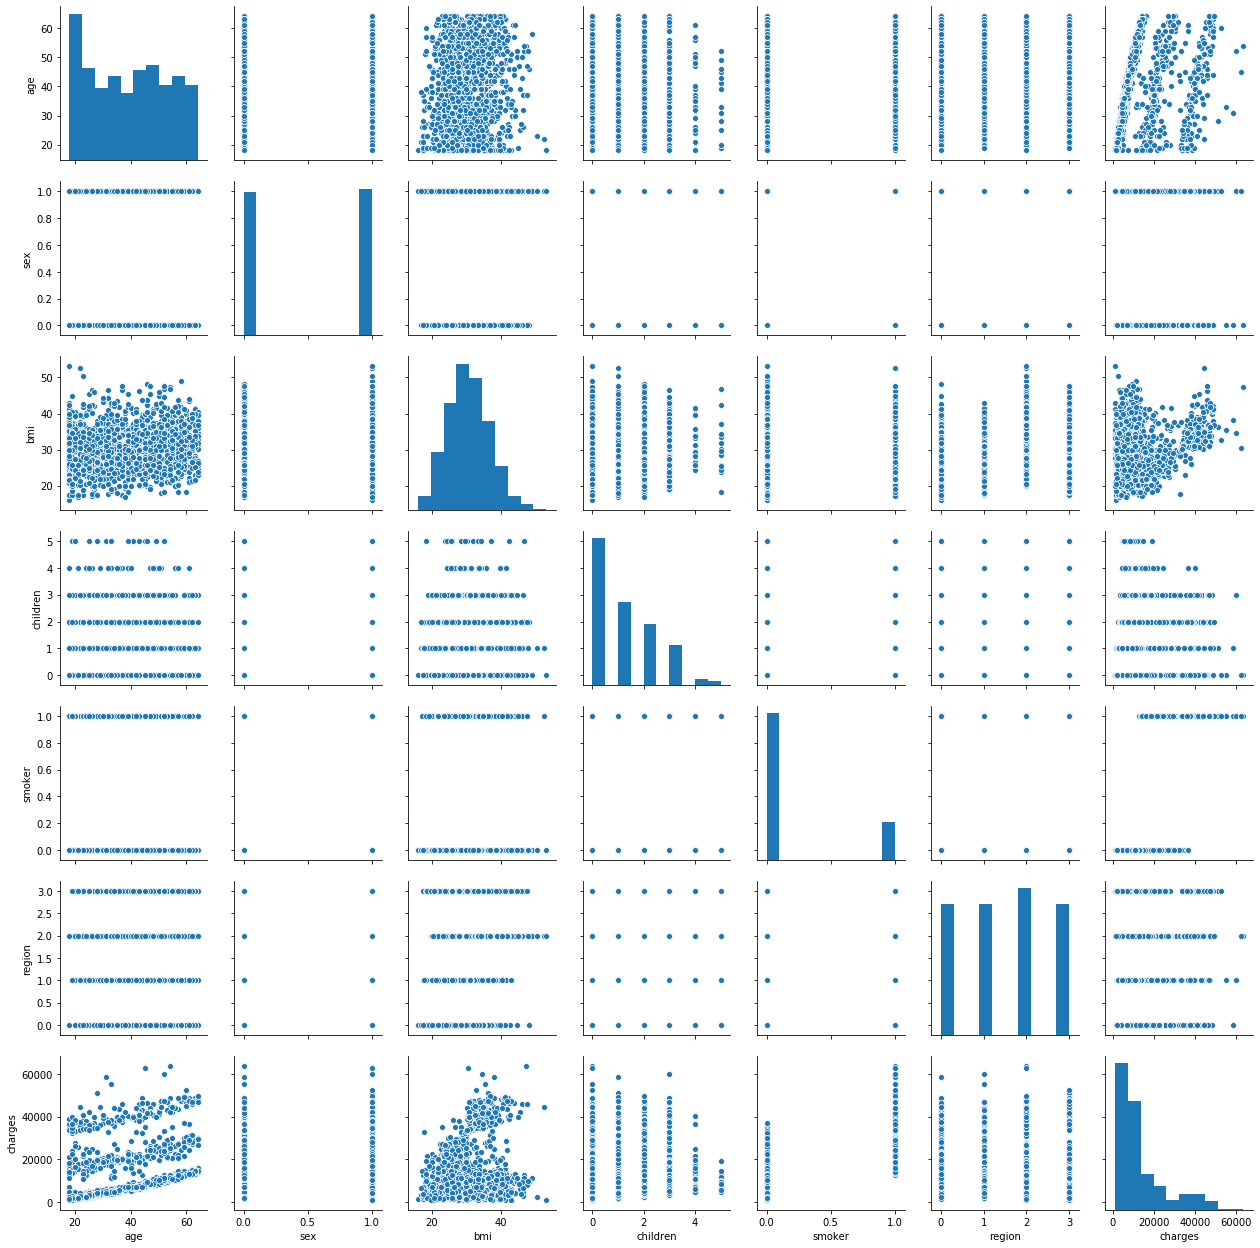

In [17]:
# 3i. Pair plot that includes all the columns of the data frame

dataframe_encoded = copy.deepcopy(dataframe)
dataframe_encoded.loc[:,['sex', 'smoker', 'region']] = dataframe_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(dataframe_encoded)

* Looks like smokers claimed more money than non-smokers
* There's an interesting pattern between 'age' and 'charges. older people are charged more than the younger ones

In [5]:
dataframe.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
dataframe = dataframe.replace(['yes','no'], [1,0])
dataframe = dataframe.replace(['female','male'], [1,0])
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


Text(0.5, 1.0, 'Effect of Smoking on Cost')

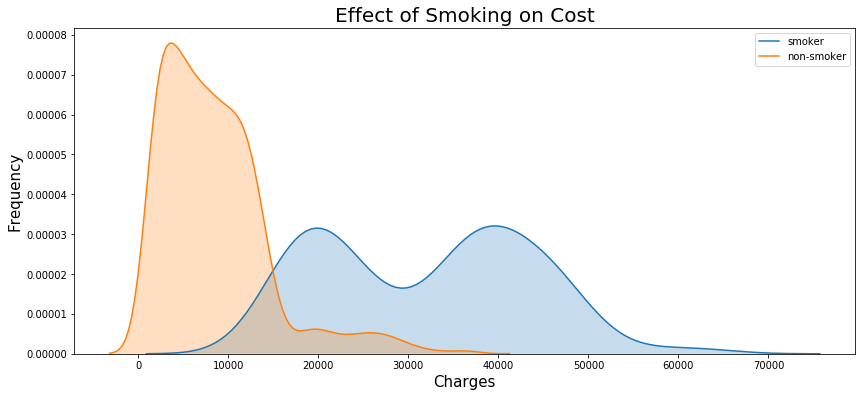

In [22]:
# 4a. Do charges of people who smoke differ significantly from the people who don't?
fig3, ax = plt.subplots()
fig3.set_size_inches(14,6)

sns.kdeplot(dataframe.loc[dataframe["smoker"] ==1]["charges"], ax=ax, shade=True, label="smoker")
sns.kdeplot(dataframe.loc[dataframe["smoker"] ==0]["charges"], ax=ax, shade=True, label="non-smoker")
ax.set_ylabel("Frequency", fontsize=15)
ax.set_xlabel('Charges', fontsize=15)
ax.set_title("Effect of Smoking on Cost", fontsize=20)

In [23]:
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"  

x = np.array(dataframe[dataframe.smoker == 1].charges)  
y = np.array(dataframe[dataframe.smoker == 0].charges) 

t, p_value  = stats.ttest_ind(x,y, axis = 0) 

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


*  Charges of smokers is differ from the non-smokers.

Text(0.5, 1.0, 'Effect of Gender on BMI')

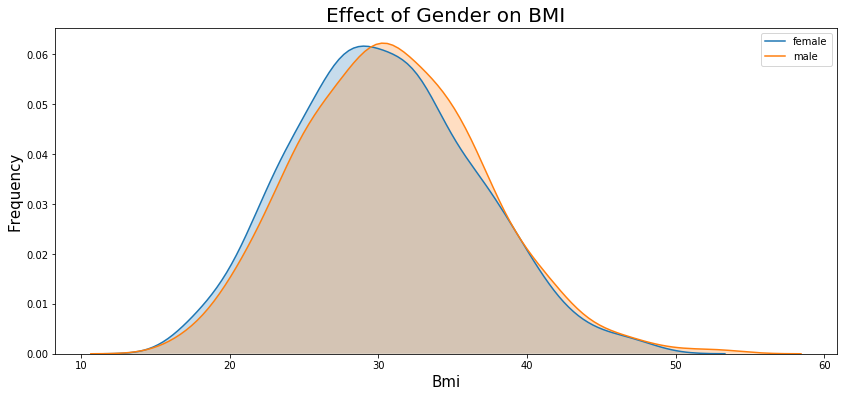

In [24]:
#  4b. Does bmi of males differ significantly from that of females? 
fig4, ax4 = plt.subplots()
fig4.set_size_inches(14,6)

sns.kdeplot(dataframe.loc[dataframe["sex"] ==1]["bmi"], ax=ax4, shade=True, label="female")
sns.kdeplot(dataframe.loc[dataframe["sex"] ==0]["bmi"], ax=ax4, shade=True, label="male")
ax4.set_ylabel("Frequency", fontsize=15)
ax4.set_xlabel('Bmi', fontsize=15)
ax4.set_title("Effect of Gender on BMI", fontsize=20)

In [26]:
Ho = "Gender has no effect on bmi"  
Ha = "Gender has an effect on bmi"  

x = np.array(dataframe[dataframe.sex == 0].bmi)  
y = np.array(dataframe[dataframe.sex == 1].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0) 

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


* Gender does not have effect on BMI.

In [28]:
# 4c.  Is the proportion of smokers significantly different in different genders? 

Ho = "Gender has no effect on smoking habits"   
Ha = "Gender has an effect on smoking habits"  

crosstab = pd.crosstab(dataframe['sex'],dataframe['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Gender has an effect on smoking habits as the p_value (0.007) < 0.05


In [29]:
crosstab

smoker,0,1
sex,,
0,517,159
1,547,115


* proportion of smokers in males is significantly different from that of the females.

Text(0.5, 1.0, 'Effect of Number of Dependents on bmi')

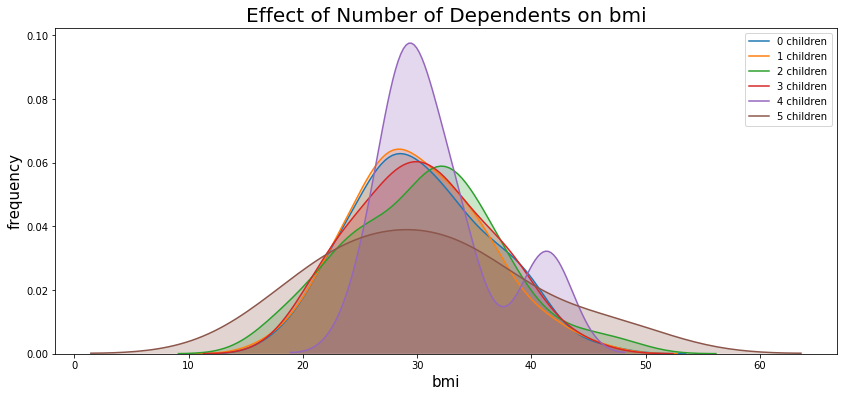

In [31]:
# 4d.   Is the distribution of bmi across women with no children, one child and two children, the same? 

fig6, ax33= plt.subplots()
fig6.set_size_inches(14,6)
female_df = copy.deepcopy(dataframe[dataframe['sex'] == 1])

sns.kdeplot(female_df[female_df.children == 0]['bmi'], ax=ax33, shade=True, label="0 children")
sns.kdeplot(female_df[female_df.children == 1]['bmi'], ax=ax33, shade=True, label="1 children")
sns.kdeplot(female_df[female_df.children == 2]['bmi'], ax=ax33, shade=True, label="2 children")
sns.kdeplot(female_df[female_df.children == 3]['bmi'], ax=ax33, shade=True, label="3 children")
sns.kdeplot(female_df[female_df.children == 4]['bmi'], ax=ax33, shade=True, label="4 children")
sns.kdeplot(female_df[female_df.children == 5]['bmi'], ax=ax33, shade=True, label="5 children")
ax33.set_ylabel("frequency", fontsize=15)
ax33.set_xlabel('bmi', fontsize=15)
ax33.set_title("Effect of Number of Dependents on bmi", fontsize=20)

In [8]:
Ho = "Women with No. of children has no effect on bmi"   
Ha = "Women with No. of children has an effect on bmi"   


female_df = copy.deepcopy(dataframe[dataframe['sex'] == 1])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']
three=female_df[female_df.children == 3]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Women with No. of children has no effect on bmi as the p_value (0.716) > 0.05


* BMI is not changed by the number of children a women has.